# Locating a new retirement community


<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Workflow" data-toc-modified-id="Workflow-2">Workflow</a></span></li><li><span><a href="#Necessary-Imports" data-toc-modified-id="Necessary-Imports-3">Necessary Imports</a></span></li><li><span><a href="#Get-the-data-for-your-analysis" data-toc-modified-id="Get-the-data-for-your-analysis-4">Get the data for your analysis</a></span></li><li><span><a href="#Create-a-5-mile-drive-time-polygon-around-the-best-performing-community." data-toc-modified-id="Create-a-5-mile-drive-time-polygon-around-the-best-performing-community-5">Create a 5-mile drive time polygon around the best performing community.</a></span></li><li><span><a href="#Proximity-analysis" data-toc-modified-id="Proximity-analysis-6">Proximity analysis</a></span></li><li><span><a href="#Determine-the-top-tapestry-segments." data-toc-modified-id="Determine-the-top-tapestry-segments.-7">Determine the top tapestry segments.</a></span></li><li><span><a href="#Enriching-study-areas" data-toc-modified-id="Enriching-study-areas-8">Enriching study areas</a></span></li><li><span><a href="#Convert-the-top-four-target-area-tapestry-counts-to-percentages." data-toc-modified-id="Convert-the-top-four-target-area-tapestry-counts-to-percentages-9">Convert the top four target area tapestry counts to percentages</a></span></li><li><span><a href="#Obtain-the-same-data-for-the-candidate-ZIP-Codes." data-toc-modified-id="Obtain-the-same-data-for-the-candidate-ZIP-Codes-10">Obtain the same data for the candidate ZIP Codes.</a></span></li><li><span><a href="#Rank-the-candidate-ZIP-Codes-by-their-similarity-to-the-target-area." data-toc-modified-id="Rank-the-candidate-ZIP-Codes-by-their-similarity-to-the-target-area.-11">Rank the candidate ZIP Codes by their similarity to the target area.</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-12">Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-13">References</a></span></li><li><span><a href="#Summary-of-tools" data-toc-modified-id="Summary-of-tools-12">Summary-of-tools</a></span></li></ul></div>

### Introduction

In the past, retirement communities in the United states were built in the suburbs, in warmest parts of the country. These days, however, people approaching retirement are not willing to relocate. They want to be connected to their friends and family, remain close to existng doctors and enjoy cultural and educational oportunites. 

This sample demonstrates the utility of ArcGIS API for Python to identify some great locations for a new retirement community, which will satisfy these needs of senior citizens.  It will demostrate the use tools such as 
`create_drive_time_areas`, `enrich_layer`, `find_similar_locations`, and editing field definitions and layer data.

First, we will look for locations that have large number of senior citizens but very few existing retirement communities. We will then rank these locations by comparing it to the most current successsful retirement community.

The LocatingRetirementCommunity Feature Layer Collection includes two layers. The first layer, called **Target Community**, contains the current best performing retirement community near Knoxville, Tennessee. The second layer, called **Candidates**, contains the 898 ZIP Codes in the continental USA associated with statistically significant hot or cold spot areas for all of these criteria:

* High demand for retirement housing opportunities
* Low supply of retirement housing
* Low housing unit vacancy rates
* Large projected age of 55 and older populations

Hot spot analysis to identify these candidate ZIP Codes was done using ArcMap. This analysis is included in both the [ArcMap and ArcGIS Pro workflows]( http://desktop.arcgis.com/en/analytics/case-studies/locating-a-new-retirement-community.htm).


In the workflow below, we will be using ArcGIS API for Python to create a 5-mile drive distance around the best performing community and obtaining [tapestry](http://www.esri.com/landing-pages/tapestry) and demographic data for the area. We will then obtain the same data for the candidate ZIP Codes. Finally, we will use the Find Similar Locations tool to identify the top four high demand, low vacancy, large projected age of 55+ population ZIP Codes that are most similar to the area surrounding the best performing community.

### Workflow

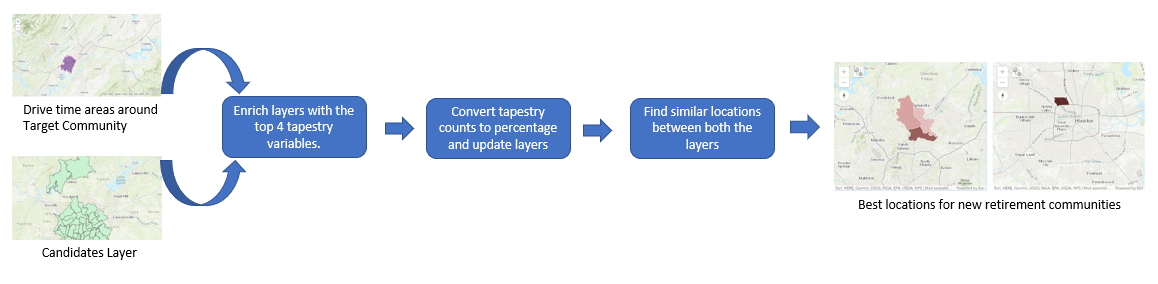

### Necessary Imports

In [1]:
import pandas as pd
from datetime import datetime as dt

from arcgis.gis import GIS
from arcgis.geoenrichment import *
from arcgis.features.use_proximity import create_drive_time_areas
from arcgis.features.enrich_data import enrich_layer
from arcgis.features import FeatureLayerCollection
from arcgis.features.find_locations import find_similar_locations

### Get the data for your analysis

In [2]:
gis = GIS('home')

Search for the **LocatingRetirementCommunity** layer. You can specify the owner's name to get more specific results. To search for content from the Living Atlas, or content shared by other users on ArcGIS Online, set `outside_org=True`.

In [3]:
items = gis.content.search('title: LocatingRetirementCommunity owner:api_data_owner',
                           'Feature layer',
                           outside_org=True)

Display the list of results.

<Item title:"LocatingRetirementCommunity" type:Feature Layer Collection owner:api_data_owner>
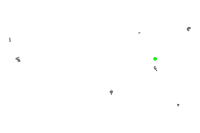

In [4]:
from IPython.display import display

for item in items:
    display(item)

Since the first item is a Feature Layer Collection, accessing the layers property will give us a list of FeatureLayer objects.

In [5]:
lyrs = items[0].layers

In [6]:
for lyr in lyrs:
    print(lyr.properties.name)

TargetCommunity
Candidates


In [7]:
target_community = lyrs[0]
candidates = lyrs[1]

In [8]:
m1 = gis.map('Knoxville')
m1

In [9]:
m1.content.add(target_community)

### Create a 5-mile drive time polygon around the best performing community.

### Proximity analysis


Proximity analysis tools help us answer one of the most common questions posed in spatial analysis: What is near what?

Proximity tools are available in the `features.use_proximity` module of ArcGIS API for Python. We can use the `create_drive_time_areas` tool to create a 5-mile drive distance buffer around the best performing community.

In [10]:
target_area = create_drive_time_areas(target_community,
                                      break_values=[5],
                                      break_units='Miles',
                                      overlap_policy='Overlap',
                                      travel_mode='Driving Distance',
                                      output_name='DriveTimeAreasOfTargetCommunities' + str(dt.now().microsecond))

In [11]:
target_area

<Item title:"DriveTimeAreasOfTargetCommunities585475" type:Feature Layer Collection owner:arcgis_python>

In [12]:
target_area_map = gis.map('Knoxville')
target_area_map

In [13]:
target_area_map.content.add(target_area)
target_area_map.content.add(target_community)

### Determine the top tapestry segments.
We will be looking for ZIP Codes that are similar to the area surrounding the best performing retirement community. We will take advantage of [tapestry variables](https://www.esri.com/en-us/arcgis/products/tapestry-segmentation/overview) because they summarize many aspects of a population, such as age, income, home value, occupation, education, and consumer spending behaviors. To identify the top tapestries within the 5-mile drive distance area, we will obtain and compare all 68 tapestry segments. We will also obtain the tapestry base variable so you can calculate percentages.

In [14]:
countries = get_countries()
usa = Country.get('US')
type(usa)
df = usa.data_collections
th_var = list(df.loc['tapestryhouseholdsNEW']['analysisVariable'].unique())
other_var = ["KeyUSFacts.POPGRWCYFY","AtRisk.TOTPOP_CY","industry.UNEMPRT_CY"]

In [15]:
analysis_var = th_var + other_var

In [16]:
tot_var= [th_var[x] for x in range(len(th_var)) if not th_var[x].split('.')[1].startswith('THHG')]

In [17]:
tot_var

['tapestryhouseholdsNEW.TSEGNUM',
 'tapestryhouseholdsNEW.TSEGCODE',
 'tapestryhouseholdsNEW.TSEGNAME',
 'tapestryhouseholdsNEW.THHBASE',
 'tapestryhouseholdsNEW.THH01',
 'tapestryhouseholdsNEW.THH02',
 'tapestryhouseholdsNEW.THH03',
 'tapestryhouseholdsNEW.THH04',
 'tapestryhouseholdsNEW.THH05',
 'tapestryhouseholdsNEW.THH06',
 'tapestryhouseholdsNEW.THH07',
 'tapestryhouseholdsNEW.THH08',
 'tapestryhouseholdsNEW.THH09',
 'tapestryhouseholdsNEW.THH10',
 'tapestryhouseholdsNEW.THH11',
 'tapestryhouseholdsNEW.THH12',
 'tapestryhouseholdsNEW.THH13',
 'tapestryhouseholdsNEW.THH14',
 'tapestryhouseholdsNEW.THH15',
 'tapestryhouseholdsNEW.THH16',
 'tapestryhouseholdsNEW.THH17',
 'tapestryhouseholdsNEW.THH18',
 'tapestryhouseholdsNEW.THH19',
 'tapestryhouseholdsNEW.THH20',
 'tapestryhouseholdsNEW.THH21',
 'tapestryhouseholdsNEW.THH22',
 'tapestryhouseholdsNEW.THH23',
 'tapestryhouseholdsNEW.THH24',
 'tapestryhouseholdsNEW.THH25',
 'tapestryhouseholdsNEW.THH26',
 'tapestryhouseholdsNEW.THH27'

In [18]:
result = [ x.split('.')[1] for x in tot_var]

In [19]:
result

['TSEGNUM',
 'TSEGCODE',
 'TSEGNAME',
 'THHBASE',
 'THH01',
 'THH02',
 'THH03',
 'THH04',
 'THH05',
 'THH06',
 'THH07',
 'THH08',
 'THH09',
 'THH10',
 'THH11',
 'THH12',
 'THH13',
 'THH14',
 'THH15',
 'THH16',
 'THH17',
 'THH18',
 'THH19',
 'THH20',
 'THH21',
 'THH22',
 'THH23',
 'THH24',
 'THH25',
 'THH26',
 'THH27',
 'THH28',
 'THH29',
 'THH30',
 'THH31',
 'THH32',
 'THH33',
 'THH34',
 'THH35',
 'THH36',
 'THH37',
 'THH38',
 'THH39',
 'THH40',
 'THH41',
 'THH42',
 'THH43',
 'THH44',
 'THH45',
 'THH46',
 'THH47',
 'THH48',
 'THH49',
 'THH50',
 'THH51',
 'THH52',
 'THH53',
 'THH54',
 'THH55',
 'THH56',
 'THH57',
 'THH58',
 'THH59',
 'THH60',
 'THH61',
 'THH62',
 'THH63',
 'THH64',
 'THH65',
 'THH66',
 'THH67',
 'THH68']

The 68 distinct markets of Tapestry detail the diversity of the American population.There are 14 LifeMode groups and 6 Urbanization groups which summarize markets that share similar traits.We will not use this for our case study. See
<a href="https://doc.arcgis.com/en/esri-demographics/data/tapestry-segmentation.htm">Tapestry Segmentation</a> for a detailed overview.

### Enriching study areas


The `enrich_layer` tool gives us demographic and landascape data for the people, places, and businesses in a specific area, or within a selected travel time or distance from a location.

To obtain the tapestry and demographic data for the area, we will use `enrich_layer` tool from the `arcgis.features.enrich_data` module.

In [20]:
target_area_data = enrich_layer(target_area,
                                analysis_variables=analysis_var,
                                output_name="GetEnrichedHouseholdTapestry" + str(dt.now().microsecond))

In [21]:
target_area_data

<Item title:"GetEnrichedHouseholdTapestry489058" type:Feature Layer Collection owner:arcgis_python>

In [22]:
data_lyr = target_area_data.layers[0]

We will convert the layer into spatially enabled dataframe to analyze top 4 tapestries.

In [23]:
sdf = pd.DataFrame.spatial.from_layer(data_lyr)
sdf.head()

AnalysisArea  ENRICH_FID  FAMGRW10_14  FacilityOID  FromBreak  HasData  \
0     31.432614           1         0.48            1          0        1   

                          ID ID_1                  Name  OBJECTID  \
0  Best Performing Community    0  Location 1 : 0 - 5.0         1   

       ...        UNEMPRT_CY_1    ZIP                  aggregationMethod  \
0      ...                 2.4  37922  BlockApportionment:US.BlockGroups   

   apportionmentConfidence  p14Seg1B  p14Seg5A  p14Seg5B  p14Seg8C  \
0                    2.576  0.107575  0.107499  0.207002  0.104505   

   populationToPolygonSizeRating  sourceCountry  
0                          2.191             US  

[1 rows x 118 columns]

In [24]:
df = sdf[result]
df.select_dtypes(include=['float64','int64']).T.sort_values(by=0, ascending=False).head().index

Index(['THHBASE', 'THH17', 'THH35', 'THH02', 'THH05'], dtype='object')

THHBASE contains the total and the highest four tapestry segments in the target community are 'THHBASE', 'THH17', 'THH35', 'THH02', 'THH05'. We will normalize them by the base value.

### Convert the top four target area tapestry counts to percentages.

Rather than counts, we want to compare tapestry percentages between each candidate ZIP Code and the target area.

Let's create four new fields to hold the tapestry percentages. We can create a feature layer instance to add new fields into your layer.

A feature service serves a collection of feature layers and tables, with the associated relationships among the entities. It is represented by arcgis.features.FeatureLayerCollection in the ArcGIS Python API.

Instances of FeatureLayerCollection can be constructed using a feature service, as shown below:

In [25]:
target_data = FeatureLayerCollection.fromitem(target_area_data)

The collection of layers and tables in a FeatureLayerCollection can be accessed using the layers and tables properties respectively:

In [26]:
data_lyr = target_data.layers[0]

In [27]:
data_lyr.manager.add_to_definition({"fields":[{"name":"THH17PERC",
                                                 "type":"esriFieldTypeDouble",
                                                 "alias":"In Style (5B) PERC",
                                                 "nullable":True,"editable":True,"length":256}]})

{'success': True}

In [28]:
data_lyr.manager.add_to_definition({"fields":[{"name":"THH35PERC",
                                         "type":"esriFieldTypeDouble",
                                         "alias":"Bright Young Professionals (8C) PERC",
                                         "nullable":True,"editable":True,"length":256}]})

{'success': True}

In [29]:
data_lyr.manager.add_to_definition({"fields":[{"name":"THH02PERC",
                                         "type":"esriFieldTypeDouble",
                                         "alias":"Professional Pride (1B) PERC",
                                         "nullable":True,"editable":True,"length":256}]})

{'success': True}

In [30]:
data_lyr.manager.add_to_definition({"fields":[{"name":"THH05PERC",
                                         "type":"esriFieldTypeDouble",
                                         "alias":"Exurbanites",
                                         "nullable":True,"editable":True,"length":256}]})

{'success': True}

Refresh to update the fields in our layer.

In [31]:
target_data.manager.refresh()

{'success': True}

In [32]:
df = pd.DataFrame.spatial.from_layer(data_lyr)

In [33]:
df[['THH17PERC','THH35PERC','THH02PERC','THH05PERC']]

THH17PERC THH35PERC THH02PERC THH05PERC
0      None      None      None      None

Next we calculate percentage and add it to the fields.

In [34]:
data_layer = target_data.layers[0]

In [35]:
data_layer.calculate('1=1', 
                     calc_expression=[{"field":"THH17PERC","sqlExpression":"THH17 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 1}

In [36]:
data_layer.calculate('1=1', 
                     calc_expression=[{"field":"THH35PERC","sqlExpression":"THH35 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 1}

In [37]:
data_layer.calculate('1=1', 
                     calc_expression=[{"field":"THH02PERC","sqlExpression":"THH02 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 1}

In [38]:
data_layer.calculate('1=1', 
                     calc_expression=[{"field":"THH05PERC","sqlExpression":"THH05 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 1}

In [39]:
sf = pd.DataFrame.spatial.from_layer(data_lyr)

In [40]:
sf[['THH17PERC', 'THH35PERC', 'THH02PERC', 'THH05PERC']]

THH17PERC  THH35PERC  THH02PERC  THH05PERC
0   0.200269   0.130942   0.110235   0.095993

In [41]:
sf[['THH17PERC', 'THH35PERC', 'THH02PERC', 'THH05PERC']]*100

THH17PERC  THH35PERC  THH02PERC  THH05PERC
0    20.0269    13.0942    11.0235     9.5993

### Obtain the same data for the candidate ZIP Codes.


In [42]:
candidates_data = enrich_layer(candidates,
                               analysis_variables=analysis_var,
                               output_name="EnrichCandidatesWithHouseholdTapestry" + str(dt.now().microsecond))

In [43]:
cand_data = FeatureLayerCollection.fromitem(candidates_data)

In [44]:
cand_layer = cand_data.layers[0]

In [45]:
cand_layer.manager.add_to_definition({"fields":[{"name":"THH17PERC",
                                                 "type":"esriFieldTypeDouble",
                                                 "alias":"In Style (5B) PERC",
                                                 "nullable":True,"editable":True,"length":256}]})

{'success': True}

In [46]:
cand_layer.manager.add_to_definition({"fields":[{"name":"THH35PERC",
                                         "type":"esriFieldTypeDouble",
                                         "alias":"Bright Young Professionals (8C) PERC",
                                         "nullable":True,"editable":True,"length":256}]})

{'success': True}

In [47]:
cand_layer.manager.add_to_definition({"fields":[{"name":"THH02PERC",
                                         "type":"esriFieldTypeDouble",
                                         "alias":"Professional Pride (1B) PERC",
                                         "nullable":True,"editable":True,"length":256}]})

{'success': True}

In [48]:
cand_layer.manager.add_to_definition({"fields":[{"name":"THH05PERC",
                                         "type":"esriFieldTypeDouble",
                                         "alias":"Exurbanites",
                                         "nullable":True,"editable":True,"length":256}]})

{'success': True}

In [49]:
rf = pd.DataFrame.spatial.from_layer(cand_layer)

In [50]:
rf.THHBASE.sort_values().head()

789    0
469    0
715    0
854    0
369    0
Name: THHBASE, dtype: int64

Notice that some of the base counts are zero. When calculating percentations with zero values, we will get a division by zero error. To avoid this, we will filter these zero (or very small) population ZIP Codes and exclude them from further analysis.

In [51]:
cand_layer.calculate('THHBASE > 0', 
                     calc_expression=[{"field":"THH17PERC","sqlExpression":"THH17 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 886}

In [52]:
cand_layer.calculate('THHBASE > 0', 
                     calc_expression=[{"field":"THH35PERC","sqlExpression":"THH35 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 886}

In [53]:
cand_layer.calculate('THHBASE > 0', 
                     calc_expression=[{"field":"THH02PERC","sqlExpression":"THH02 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 886}

In [54]:
cand_layer.calculate('THHBASE > 0', 
                     calc_expression=[{"field":"THH05PERC","sqlExpression":"THH05 / THHBASE"}])

{'success': True, 'updatedFeatureCount': 886}

In [55]:
cf = pd.DataFrame.spatial.from_layer(cand_layer)

In [56]:
cf[['THH17PERC', 'THH35PERC', 'THH02PERC', 'THH05PERC']]

THH17PERC  THH35PERC  THH02PERC  THH05PERC
0     0.000000   0.000000   0.000000   0.000000
1     0.000000   0.000000   0.000000   0.000000
2     0.000000   0.000000   0.000000   0.000000
3     0.000000   0.000000   0.000000   0.199850
4     0.000000   0.000000   0.000000   0.000000
5     0.000000   0.000000   0.000000   0.000000
6     0.000000   0.000000   0.000000   0.213139
7     0.000000   0.000000   0.000000   0.000000
8     0.000000   0.000000   0.000000   0.029358
9     0.000000   0.000000   0.069309   0.000000
10    0.000000   0.000000   0.000069   0.000000
11    0.000000   0.000000   0.000000   0.000000
12    0.000000   0.000000   0.000000   0.000000
13    0.000000   0.000000   0.000000   0.000000
14    0.000000   0.000000   0.000000   0.000000
15    0.000000   0.000000   0.211090   0.000000
16    0.000000   0.000000   0.000000   0.000000
17    0.000000   0.000000   0.000000   0.000000
18    0.000000   0.000000   0.392234   0.000000
19    0.000000   0.000000   0.000000   0.000000
20    0.000000   0.000000   0.000000   0.000000
21    0.000000   0.000000   0.000000   0.000000
22    0.000000   0.000000   0.000000   0.000000
23    0.000000   0.000000   0.000000   0.000000
24    0.000000   0.000000   0.000000   0.000000
25    0.000000   0.000000   0.102909   0.054188
26    0.000000   0.000000   0.039415   0.000000
27    0.000000   0.000000   0.000000   0.000000
28    0.000000   0.000000   0.000000   0.000000
29    0.000000   0.000000   0.000000   0.000000
..         ...        ...        ...        ...
868   0.000000   0.000000   0.039223   0.000000
869   0.000000   0.000000   0.000000   0.017223
870   0.000000   0.000000   0.000000   0.000000
871   0.042964   0.038995   0.000000   0.048521
872   0.000000   0.000000   0.014048   0.036941
873   0.000000   0.000000   0.000000   0.149811
874   0.000000   0.000000   0.000000   0.000000
875   0.000000   0.000000   0.000000   0.011015
876   0.000000   0.000000   0.000000   0.000000
877   0.000000   0.000000   0.000000   0.000000
878   0.029763   0.000000   0.000000   0.000000
879   0.000000   0.000000   0.023548   0.080144
880   0.000000   0.000000   0.000000   0.055476
881   0.000000   0.000000   0.000000   0.143125
882   0.000000   0.000000   0.000000   0.000000
883   0.000000   0.059280   0.000000   0.000000
884   0.000000   0.000000   0.000000   0.000000
885   0.000000   0.000000   0.000000   0.000000
886   0.000000   0.000000   0.000000   0.000000
887   0.000000   0.000000   0.000000   0.000000
888   0.000000   0.000000   0.000000   0.095757
889   0.000000   0.000000   0.000000   0.000000
890   0.000000   0.000000   0.380585   0.012765
891   0.000000   0.000000   0.000000   0.000000
892   0.000000   0.000000   0.065382   0.000000
893   0.000000   0.000000   0.069086   0.021716
894   0.000000   0.000000   0.339260   0.011854
895   0.000000   0.000000   0.172826   0.144199
896   0.041653   0.039816   0.105618   0.000000
897   0.000000   0.000000   0.052814   0.006123

[898 rows x 4 columns]

### Rank the candidate ZIP Codes by their similarity to the target area.

In [57]:
top_4_most_similar_results = find_similar_locations(data_layer,
                                                    cand_layer,
                                                    analysis_fields=['THH17','THH35','THH02','THH05','POPDENS14','FAMGRW10_14','UNEMPRT_CY'],
                                                    output_name = "Top4SimilarLocations" + str(dt.now().microsecond),
                                                    number_of_results=4)

In [58]:
top_4_most_similar_results = top_4_most_similar_results['similar_result_layer']
top_4_most_similar_results

<Item title:"Top4SimilarLocations933786" type:Feature Layer Collection owner:arcgis_python>

In [59]:
map1 = gis.map('Atlanta')
map1.content.add(top_4_most_similar_results)

In [60]:
map2 = gis.map('Houston')
map2.content.add(top_4_most_similar_results)

In [61]:
from ipywidgets import *

map1.layout=Layout(flex='1 1', padding='10px', height='420px')
map2.layout=Layout(flex='1 1', padding='10px', height='420px')

box = HBox([map1, map2])
box

One of the top ZIP Codes is located near Houston and three are located near Atlanta.

### Conclusion

We have analysed great locations to start a new retiremnent community project.

### References
- Brennan, Morgan. 2012. "America's Friendliest Towns." Forbes, December 19, 2012. http://www.forbes.com/sites/morganbrennan/2012/12/19/americas-friendliest-towns/

- City of Roswell, Georgia. "City Awards and Achievements." http://www.roswellgov.com/discover-us/city-awards-achievements

- City of Taylor Lake Village, Texas. http://www.taylorlakevillage.us

- Grunewald, Will. 2014. "How Baby Boomers Are Changing Retirement Living." Washingtonian, March 13, 2014. http://www.washingtonian.com/articles/people/how-baby-boomers-are-changing-retirement-living/

- Heneghan, Carolyn. 2014. "The 50 Safest Cities in Georgia." The SafeWise Report, Safewise.com, February 17, 2014. http://www.safewise.com/blog/50-safest-cities-georgia/

- Holley, Peter; Lomax, John; and Shilcutt, Katharine. 2014. "Where to Live Now: The 25 Hottest Neighborhoods of 2014." Houstonia, April 3, 2014. http://www.houstoniamag.com/articles/2014/4/3/where-to-live-now-hottest-neighborhoods-april-2014

- Kilborn, Peter T. 2009. "In Depth: America's 25 Best Places to Move." Forbes, July 7, 2009. http://www.forbes.com/2009/07/07/relocate-relocation-cities-lifestyle-real-estate-affordable-moving_slide.html

- Northern, Amanda. 2015. "Here Are The Best Places To Live In Georgia… And Why." OnlyInYourState.com, June 19, 2015. http://www.onlyinyourstate.com/georgia/best-places-to-live-in-ga/


### Summary of tools

<table>
  <tr>
    <th>Method</th>
    <th>Generic Question</th>
    <th>Examples</th>
  </tr>
  <tr>
    <td>Attribute Query</td>
    <td>Which features have the characteristics I'm interested in?</td>
    <td>Which features have more than 50,000 people and median annual incomes larger than $50,000?<br>Which hospitals have readmission rates larger than 10 percent?</td>
  </tr>
  <tr>
    <td>Find Similar Locations</td>
    <td>Which features are most like my target feature?</td>
    <td>Which stores are similar to my best performing store?<br>Which crimes in the database are most like the current one I want to solve?</td>
  </tr>
  <tr>
    <td>Identify drive time or drive distance areas</td>
    <td>What are the dimensions, based on time or distance, of the area surrounding a location?</td>
    <td>What does a 5-mile or 5-minute walking, biking, or driving distance around the hospital look like?<br>What can I visit within a 2KM walk from my hotel?</td>
  </tr>
  <tr>
    <td>Enrich layer</td>
    <td>Want to know about the tapestry and demographic data for the area?</td>
    <td>Which zip codes have higher population of +55 age and above?</td>
  </tr>
</table>